In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import math
import time
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from sympy import integrate, init_printing
from sympy.abc import x
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

%matplotlib inline

ModuleNotFoundError: No module named 'sympy'

# Tarea 4

Con base a los métodos vistos en clase resuelva las siguientes dos preguntas

## (A) Integrales

* $\int_{0}^{1}x^{-1/2}\,\text{d}x$

-Metodo Cuadratica Gaussianas

In [2]:
x = 0.01
x0 = 1
N = 10

In [3]:
x1 = np.linspace(x,x0, N)

V = np.matrix([x1**i for i in range(len(x1))]  )
V_i = np.linalg.inv(V)

In [4]:
I = np.matrix([(( x0**(N+1) - x**(N+1)) /(N+1)) for N in range(len(x1)) ]).T

In [5]:
def f(x):
    return (x)**(-1/2)

In [6]:
vectF= np.matrix([f(x1[i]) for i in range(len(x1))]).T

In [7]:
Integral=((vectF.T*V_i*I)[0,0])

In [8]:
Integral=round(Integral)

In [9]:
print ("El valor de la integral es",Integral)  

El valor de la integral es 2


-Metdodo del Trapecio 

In [10]:
def f(x):
    return (x)**(-1/2)

a=0.001
b=1
n=100

x=np.linspace(a,b,n)
dx=(b-a)/n

In [11]:
I=0
for i in range (n):
    area=(f(a)+f(a+dx))*dx/2
    I=I+ area
    a=a+dx
r=round(I)
print ("El valor de la integral es",r)

El valor de la integral es 2


* $\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$

-Metodo Cuadratica Gaussianas

In [12]:
x = 0.1
x0 = 1
N = 10

In [13]:
x1 = np.linspace(x,x0, N)

V = np.matrix([x1**i for i in range(len(x1))]  )
V_i = np.linalg.inv(V)

In [14]:
I = np.matrix([(( x0**(N+1) - x**(N+1)) /(N+1)) for N in range(len(x1)) ]).T

In [15]:
def f(x):
    return np.exp(-x)*np.log(x)

In [16]:
vectF= np.matrix([f(x1[i]) for i in range(len(x1))]).T

In [17]:
print ("El valor de la integral es", (vectF.T*V_i*I)[0,0])            

El valor de la integral es -0.4800999189984445


-Metodo del trapecio

In [18]:
def f(x):
    return np.exp(-x)*np.log(x)

a=0.1
b=1/2.5
n=10

x=np.linspace(a,b,n)
dx=(b-a)/n

In [19]:
I=0
for i in range (n):
    area=(f(a)+f(a+dx))*dx/2
    I=I+ area
print ("El valor de la integral es",I)
            

El valor de la integral es -0.5812460606926427


* $\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

-Metodo Cuadratica Gaussianas

In [20]:
x = 0.000000001
x0 = 10-2
N = 10

In [21]:
x1 = np.linspace(x,x0, N)

V = np.matrix([x1**i for i in range(len(x1))]  )
V_i = np.linalg.inv(V)

In [22]:
I = np.matrix([(( x0**(N+1) - x**(N+1)) /(N+1)) for N in range(len(x1)) ]).T

In [23]:
def f(x):
    return np.sin(x)/x


In [24]:
vectF= np.matrix([f(x1[i]) for i in range(len(x1))]).T

In [25]:
print ("El valor de la integral es", (vectF.T*V_i*I)[0,0])

El valor de la integral es 1.5743680900256365


-Metodo del trapecio

In [26]:
def f(x):
    return np.sin(x)/x

a=0.00001
b=1.5
n=101

x=np.linspace(a,b,n)
dx=(b-a)/n


In [27]:
I=0
for i in range (n):
    area=(f(a)+f(a+dx))*dx/2
    I=I+ area
print ("El valor de la integral es",I)
            

El valor de la integral es 1.499962392876672


## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la **Tarea 3 (D)** en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). Ajuste la transformada de Fourier para los datos de la **Tarea 3** usando el método de regresión exacto de la **Tarea 3 (C)** y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.

La funcion es:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.


En la tarea 3 se encontraron los valores de $a$, $b$, $c$ y $\gamma$.
Los cuales son:
* $a$ =0.68740987
* $b$ =1.39239372
* $c$ =0.49566194
* $\gamma$ =0.93666128

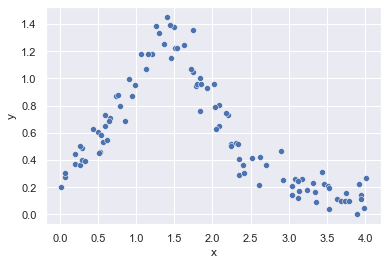

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [28]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

In [29]:
a=0.68740987
b=1.39239372
c=0.49566194
g=0.93666128

In [30]:
X=df["x"]
y=df["y"]
def f(x):
    return (a)/((x-b)**2 + c)**g

x=f(X)

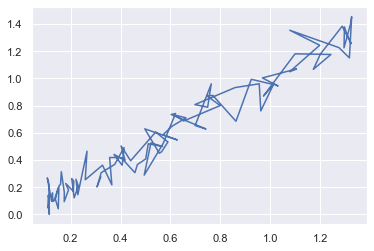

In [31]:
plt.plot(x,y)

In [32]:
Nf = 25
a = np.min(x)
b = np.max(x)
def a_j(j):
    global a, b, x, y
    # integra la funcion entre 0 y 10
    L = b - a
    k_j = 2*np.pi*j/4
    new_y = y*np.cos(k_j*x)/L
    if j > 0:
        new_y = new_y * 2
    return sp.integrate.simpson(new_y, x)
def b_j(j):
    global a, b, x, y
    # integra la funcion entre 0 y 10
    L = b - a
    k_j = 2*np.pi*j/4
    new_y = y*np.sin(k_j*x)/L
    if j > 0:
        new_y = new_y * 2
    return sp.integrate.simpson(new_y, x)
J = np.array(range(Nf))
A_j = np.array([a_j(j) for j in range(Nf)])
B_j = np.array([b_j(j) for j in range(Nf)])

In [33]:
x_tilde = np.linspace(a,b-a,20000)
k_j = np.array([2*np.pi*j/4 for j in range(Nf)])
y_tilde = np.sum([
    A_j[j] * np.cos(k_j[j]*x_tilde) + B_j[j] * np.sin(k_j[j]*x_tilde) for j in range(Nf)
], axis=0)

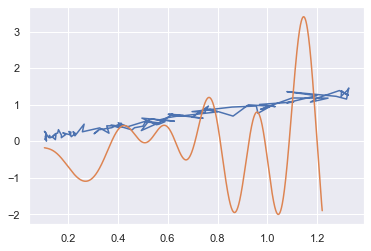

In [34]:
plt.plot(x,y)
plt.plot(x_tilde, y_tilde)